#### [PREVIOUS](4.SQL_course_specification.ipynb) | [HOME](../README.md) | [NEXT](6.export_import_course_specification.ipynb)

---

### Model Evaluation

This Jupyter Notebook is a demonstration of evaluating a model. We will be comparing the prediction with some test data to evaluate the effectiveness of the model.

#### Step 1

Load the required dependencies.


In [1]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

####  Step 2
Open and parse the CSV file and store the data as variables array data objects.

In [2]:
training_data = pd.read_csv('data/3.course_specifications_data.csv', delimiter=',')
x = np.array(training_data.iloc[:,1]).reshape(-1, 1)
y = np.array(training_data.iloc[:,0])

#### Step 3

Use the [Scikit-learn](https://scikit-learn.org/stable/) library to instantiate a `LinearRegression` Machine Learning model class and store it in the `my_model` variable as an object, passing a range of parameters to configure the model. Then use the `fit` method from the `LinearRegression` class to fit the model to the training data

In [3]:
# Create the model
my_model = LinearRegression()
# Fit the model to the data
my_model.fit(x, y)

LinearRegression()

####  Step 4
Open and parse the test data CSV file and store the data as variable array data objects.

In [4]:
testing_data = pd.read_csv('data/6.model_test_and_validate_data.csv', delimiter=',')
x_test = np.array(testing_data.iloc[:,1]).reshape(-1, 1)
y_test = np.array(testing_data.iloc[:,0])

#### Step 5

Plot the test data features and targets to the linear regression model to visually evaluate the model.

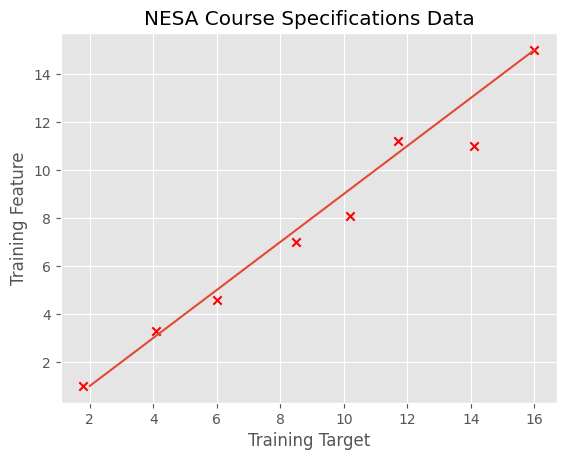

In [5]:
y_pred = my_model.predict(x)
plt.plot(x, y_pred)
plt.scatter(x_test, y_test, marker='x', c='r')
plt.title("NESA Course Specifications Data")
plt.ylabel(f'Training {training_data.columns[0]}')
plt.xlabel(f'Training {training_data.columns[1]}')
plt.show()

#### Step 6

Manually calculate and evaluate the 'loss' and 'cost' of the model using the test data.

In [6]:
table = pd.DataFrame({
    testing_data.columns[0]: x_test.flatten(),  # Flatten x for easy display
    testing_data.columns[1]: y_test,
    'Predicted result':my_model.predict(x_test),
    'Loss' : y_test - my_model.predict(x_test).round(2)
})
print(table)
cost = table['Loss'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost}")

   Feature  Target  Predicted result  Loss
0      1.8     1.0               0.8   0.2
1      4.1     3.3               3.1   0.2
2      6.0     4.6               5.0  -0.4
3      8.5     7.0               7.5  -0.5
4     10.2     8.1               9.2  -1.1
5     11.7    11.2              10.7   0.5
6     14.1    11.0              13.1  -2.1
7     16.0    15.0              15.0   0.0
The cost or average loss of this model is -0.4


**Loss** is a measure of the difference of a single example to its target value while the  
**Cost** is a measure of the losses over the training set

#### Step 7

Use the 'score' method of the `LinearRegression` class to return a score based evaluation of the models accuracy or performance.

In [7]:
train_score = my_model.score(x, y)
test_score = my_model.score(x_test, y_test)
print(f'Training data score: {train_score}')
print(f'Testing data score: {test_score}')

Training data score: 1.0
Testing data score: 0.9578584680625496


Interpreting the score:
| Score | Interpretation |
| --- | --- |
| Score = 1 | Perfect fit. The model explains all the variability in the target variable. |
| Score = 0 | The model does not explain any variability in the target variable. |
| 0 < Score < 1 |  - The model explains a proportion of the variability in the target variable with a higher Score indicating a better fit. |

#### Step 8

Calculate the Mean Square Error (MSE), which measures how much the predicted result deviates from the actual, because of the squared term more weight is given to larger errors. This metric is very helpful when evaluating models with outliers.

In [8]:
train_mse = mean_squared_error(y, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
print(f"The Mean Squared error for the training data is: {"%.5f" % train_mse}")
print(f"The Mean Squared error for the testing data is: {"%.5f" % test_mse}")

The Mean Squared error for the training data is: 0.00000
The Mean Squared error for the testing data is: 0.63750


Whilst a low MSE is desirable, interpretating MSE is less straight forward than 'Score'. It can be helpful when comparing performance of different models against the same dataset.

#### Step 9

Evaluate the X axis intercept and gradient or coefficient of your model by using the getter methods to return the intercept and coefficient from my_model() object.

In [9]:
print(f'X Axis intercept: {my_model.intercept_}')
print(f'Coefficient: {my_model.coef_}')

X Axis intercept: -1.0000000000000036
Coefficient: [1.]
